### Importing necessary libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Loading the DataFrame

In [4]:
df = pd.read_csv("Cars_data.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Brand,Manufacturing Year,Model,Kilometers Driven,Fuel Type,Transmission Type,Price,Location
0,Hyundai,2017,Creta SX PLUS AT 1.6 PETROL,98493,Petrol,Automatic,953000,Bangalore
1,Hyundai,2017,Eon ERA PLUS (O),33963,Petrol,Manual,381000,Bangalore
2,Hyundai,2019,Creta SX 1.6 DIESEL,43987,Diesel,Manual,1152000,Bangalore
3,Hyundai,2019,NEW SANTRO MAGNA,33609,Petrol,Manual,429000,Bangalore
4,Hyundai,2021,NEW I20 ASTA 1.0 TURBO IMT DUAL TONE,26797,Petrol,Manual,1021000,Bangalore


### Removing duplicated rows

In [5]:
df = df.drop_duplicates(keep='first')

### Finding number of "Missing / NAN" values

In [6]:
df.isnull().sum().sort_values(ascending=False)

Brand                 0
Manufacturing Year    0
Model                 0
Kilometers Driven     0
Fuel Type             0
Transmission Type     0
Price                 0
Location              0
dtype: int64

##### Since there is no missing values we can start analyzing the data

### Analysing the Data

#### Names of the columns

In [7]:
df.columns

Index(['Brand', 'Manufacturing Year', 'Model', 'Kilometers Driven',
       'Fuel Type', 'Transmission Type', 'Price', 'Location'],
      dtype='object')

#### Information of all columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               2373 non-null   object
 1   Manufacturing Year  2373 non-null   int64 
 2   Model               2373 non-null   object
 3   Kilometers Driven   2373 non-null   int64 
 4   Fuel Type           2373 non-null   object
 5   Transmission Type   2373 non-null   object
 6   Price               2373 non-null   int64 
 7   Location            2373 non-null   object
dtypes: int64(3), object(5)
memory usage: 148.4+ KB


#### Number of rows in a DataFrame

In [9]:
df.index

RangeIndex(start=0, stop=2373, step=1)

#### Checking Datatype of all columns

In [10]:
df.dtypes

Brand                 object
Manufacturing Year     int64
Model                 object
Kilometers Driven      int64
Fuel Type             object
Transmission Type     object
Price                  int64
Location              object
dtype: object

### Gathering all "Statistical Details" of different columns

In [11]:
df.describe(include='all')

,Brand,Manufacturing Year,Model,Kilometers Driven,Fuel Type,Transmission Type,Price,Location
count,2373,2373.000000,2373,2373.000000,2373,2373,2.373000e+03,2373
unique,4,NaN,512,NaN,4,2,NaN,4
top,Maruti,NaN,Swift VXI,NaN,Petrol,Manual,NaN,Bangalore
freq,1164,NaN,68,NaN,2068,1754,NaN,811
mean,NaN,2017.651075,NaN,50317.729878,NaN,NaN,5.963456e+05,NaN
std,NaN,3.082008,NaN,26968.343988,NaN,NaN,2.766613e+05,NaN
min,NaN,2010.000000,NaN,476.000000,NaN,NaN,1.070000e+05,NaN
25%,NaN,2016.000000,NaN,29239.000000,NaN,NaN,4.110000e+05,NaN
50%,NaN,2018.000000,NaN,47500.000000,NaN,NaN,5.380000e+05,NaN
75%,NaN,2020.000000,NaN,69271.000000,NaN,NaN,7.190000e+05,NaN


##### Some statistical details can't be calculated for object type so it gives 'NaN' values

# Analysing & Visualizing the Data

## 1) Total number of cars in different Cities 

In [13]:
df.Location.unique()

array(['Bangalore', 'delhi-ncr', 'Hyderabad', 'Mumbai'], dtype=object)

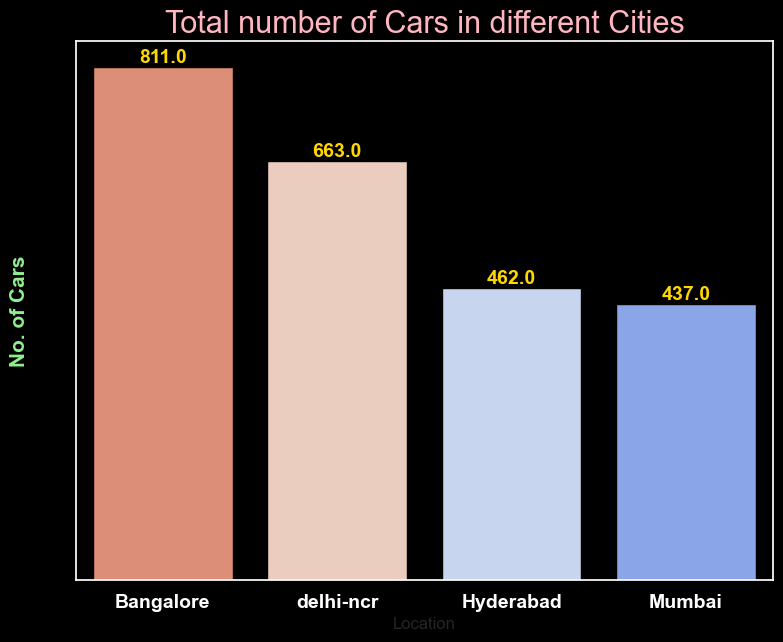

In [24]:
plt.figure(facecolor='black',figsize=(9,7))

a = sns.countplot(x = 'Location',data=df,edgecolor='black',palette='coolwarm_r')

for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='gold',fontweight='bold')
    
plt.title("Total number of Cars in different Cities",fontsize=22,color='lightpink')
plt.xticks(rotation=0,fontsize=14,fontweight='bold',color='white')
plt.yticks(fontsize=12,fontweight='bold',color='black')
a.set_facecolor('black')
a.set_ylabel("No. of Cars", fontsize =15, color='lightgreen',fontweight='bold')

plt.grid(False)

## 2) Percentage of cars available for sale in different cities

In [27]:
df

,Brand,Manufacturing Year,Model,Kilometers Driven,Fuel Type,Transmission Type,Price,Location
0,Hyundai,2017,Creta SX PLUS AT 1.6 PETROL,98493,Petrol,Automatic,953000,Bangalore
1,Hyundai,2017,Eon ERA PLUS (O),33963,Petrol,Manual,381000,Bangalore
2,Hyundai,2019,Creta SX 1.6 DIESEL,43987,Diesel,Manual,1152000,Bangalore
3,Hyundai,2019,NEW SANTRO MAGNA,33609,Petrol,Manual,429000,Bangalore
4,Hyundai,2021,NEW I20 ASTA 1.0 TURBO IMT DUAL TONE,26797,Petrol,Manual,1021000,Bangalore
...,...,...,...,...,...,...,...,...
2368,Toyota,2021,URBAN CRUISER MID GRADE MT,39069,Petrol,Manual,826000,Mumbai
2369,Toyota,2022,URBAN CRUISER PREMIUM GRADE AT,13896,Petrol,Automatic,1106000,Mumbai
2370,Toyota,2021,URBAN CRUISER PREMIUM GRADE MT,18001,Petrol,Manual,894000,Mumbai
2371,Toyota,2015,Innova 2.5 VX 7 STR,121038,Diesel,Manual,883000,Mumbai


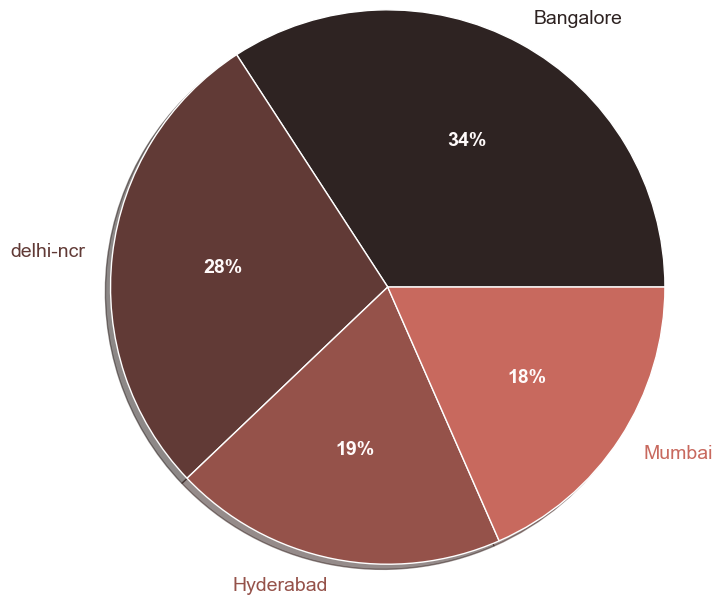

In [31]:
count = df['Location'].value_counts().reset_index().rename(columns={'Location': 'Loc', 'index': 'Location'})
colors = sns.color_palette('dark:salmon', 5)
patches, text, pcts = plt.pie(
    count['count'], 
    labels=count['Loc'], 
    autopct='%1.0f%%', 
    colors=colors, 
    radius=1.5, 
    shadow=True,
    textprops={'fontsize': 14}
)

for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='snow', fontweight='bold')
plt.show()

## 3) No. of different Brands in all Cities

In [35]:
brand_count = df['Brand'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns = {'index':'Brand','Brand':'Count'})

In [36]:
brand_count

,Count,count
0,Maruti,1164
1,Hyundai,876
2,Tata,271
3,Toyota,62


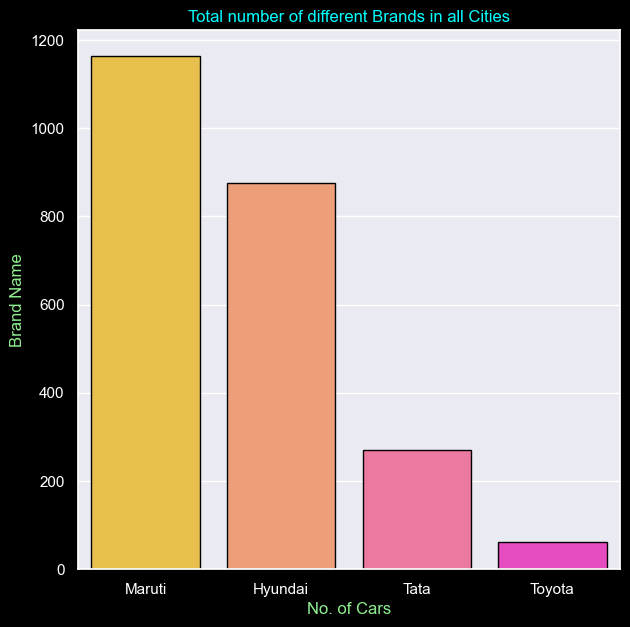

In [45]:
plt.figure(facecolor='black', figsize=(7, 7))
a = sns.barplot(y='count', x='Count', data=brand_count, palette='spring_r', edgecolor='black')

plt.xticks(color='white')
plt.yticks(color='white')
a.set_xlabel("No. of Cars", color='lightgreen')
a.set_ylabel("Brand Name", color='lightgreen')
plt.title("Total number of different Brands in all Cities", color='cyan')

plt.show()


##  4) Average Price of all the brands

In [46]:
avg_price = df.groupby(by=['Brand'])['Price'].mean().sort_values(ascending=False).reset_index().rename(
    columns={'Price':'Avg Price'})
avg_price['Avg Price'] = avg_price['Avg Price'].astype(int)

In [48]:
avg_price

,Brand,Avg Price
0,Tata,813173
1,Toyota,741129
2,Hyundai,618454
3,Maruti,521513


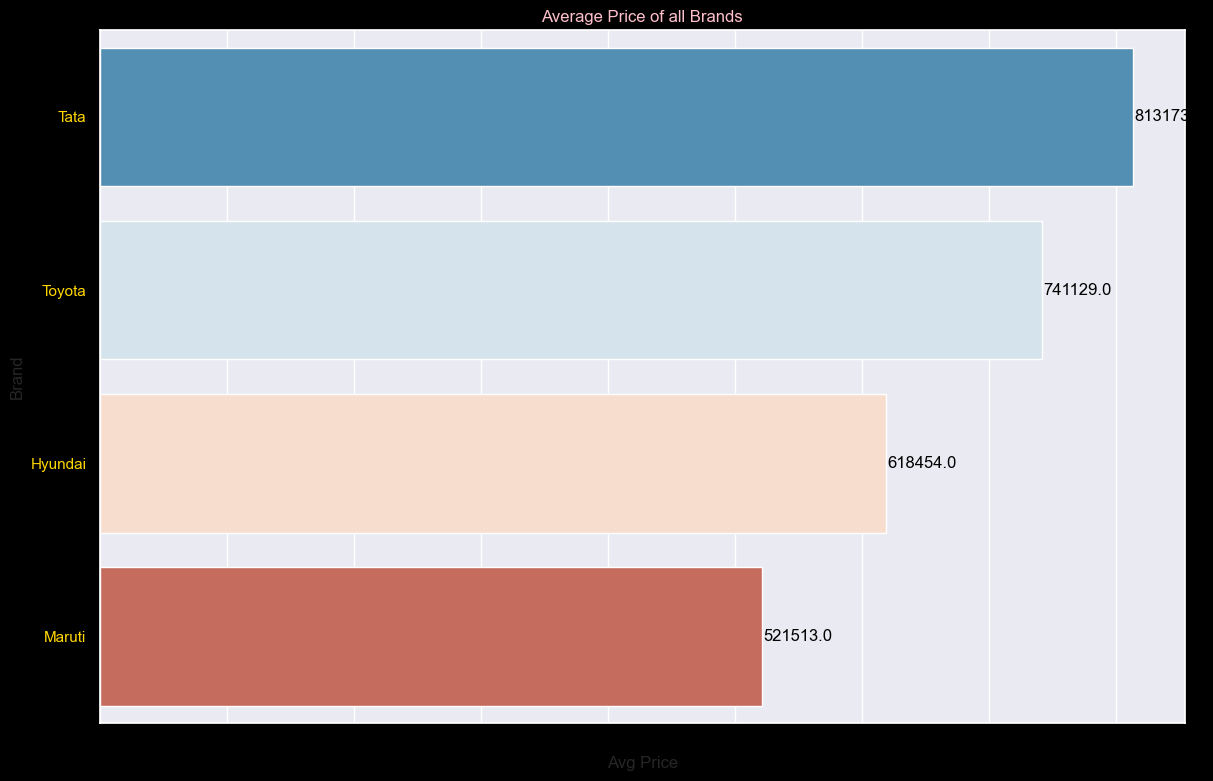

In [54]:
plt.figure(facecolor='black', figsize=(14, 9))
a = sns.barplot(y='Brand', x='Avg Price', data=avg_price, palette='RdBu_r')

for p in a.patches:
    plt.text(p.get_width() + 1000, p.get_y() + p.get_height() / 2, f'{p.get_width():.1f}', ha='left', va='center', color='black')

plt.xticks(color='black')
plt.yticks(color='gold')
plt.title("Average Price of all Brands", color='pink')

plt.show()


## 5) Total no. of different Car Brands in Hyderabad

In [71]:
hyd_city = df.loc[(df['Location'] == 'Hyderabad')]
hyd_brands = hyd_city['Brand'].value_counts().sort_values(ascending = False).reset_index()

In [72]:
hyd_brands

,Brand,count
0,Maruti,251
1,Hyundai,155
2,Tata,46
3,Toyota,10


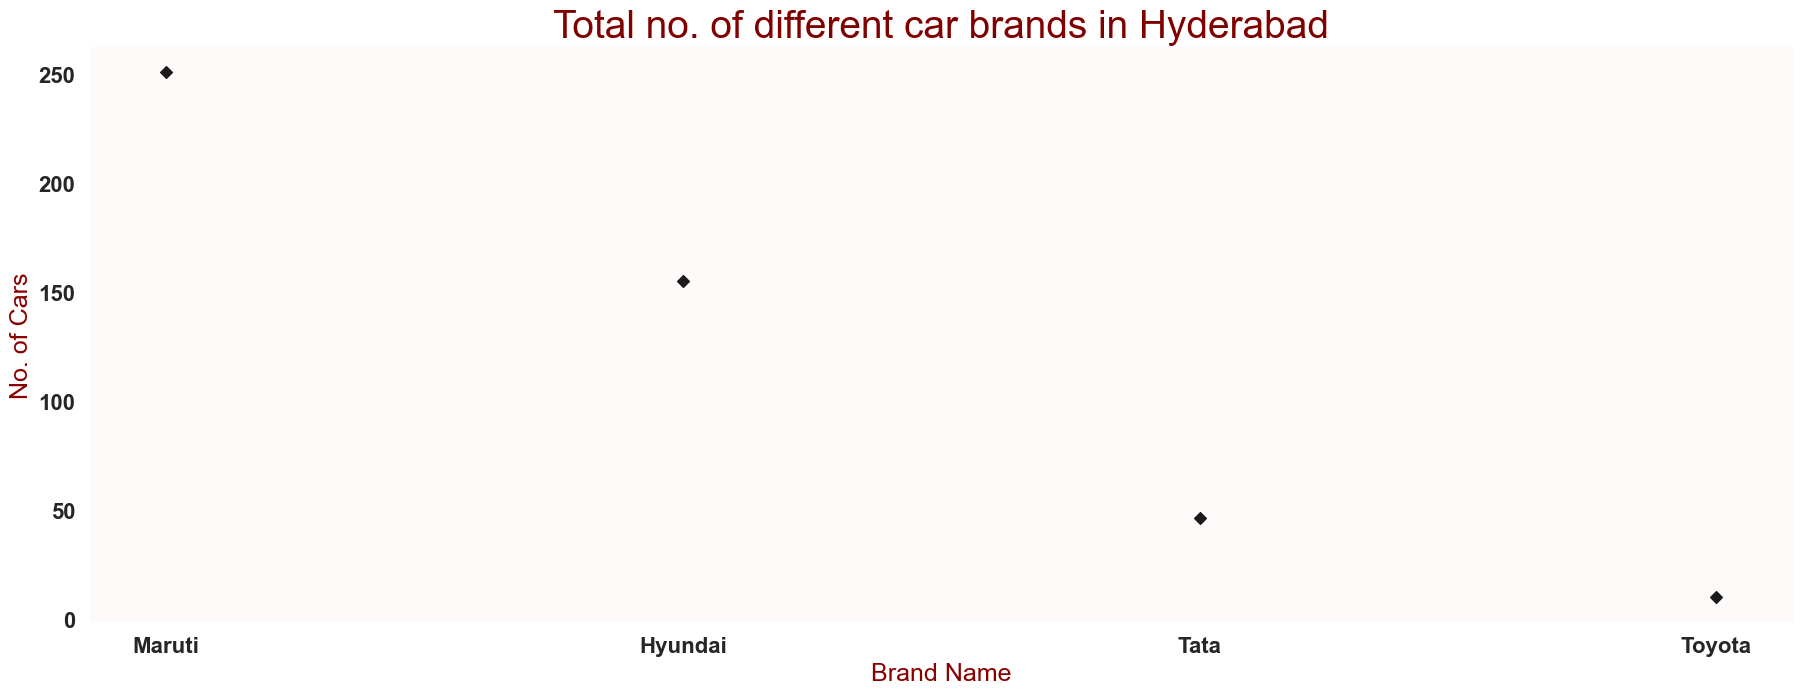

In [60]:

fig, ax = plt.subplots()
ax.set_facecolor('snow')
plt.scatter('Brand','count',data=hyd_brands,color='k',marker='D')
plt.xticks(rotation=0,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Hyderabad",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

## 6) Total no. of different Car Brands in Delhi

In [73]:
delhi_city = df.loc[(df['Location'] == 'delhi-ncr')]
delhi_brands = delhi_city['Brand'].value_counts().sort_values(ascending = False).reset_index()

In [74]:
delhi_brands

,Brand,count
0,Maruti,343
1,Hyundai,216
2,Tata,84
3,Toyota,20


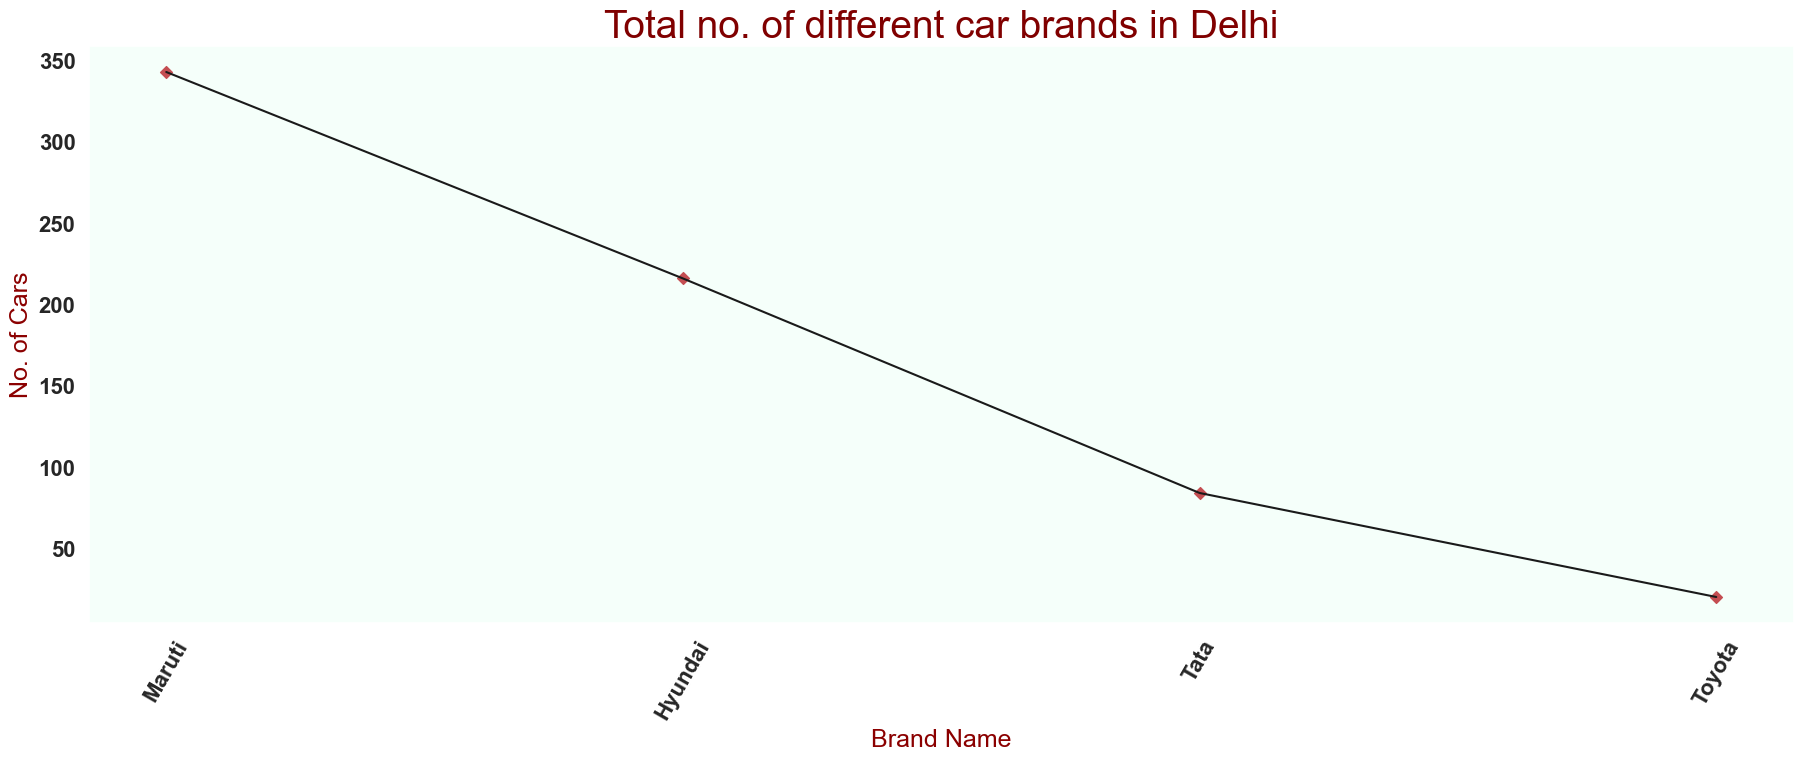

In [67]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','count',data=delhi_brands,color='k')
plt.scatter('Brand','count',data=delhi_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Delhi",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

## 7) Total no. of different Car Brands in Mumbai

In [75]:
mumbai_city = df.loc[(df['Location'] == 'Mumbai')]
mumbai_brands = mumbai_city['Brand'].value_counts().sort_values(ascending = False).reset_index()

In [76]:
mumbai_brands

,Brand,count
0,Maruti,201
1,Hyundai,173
2,Tata,44
3,Toyota,19


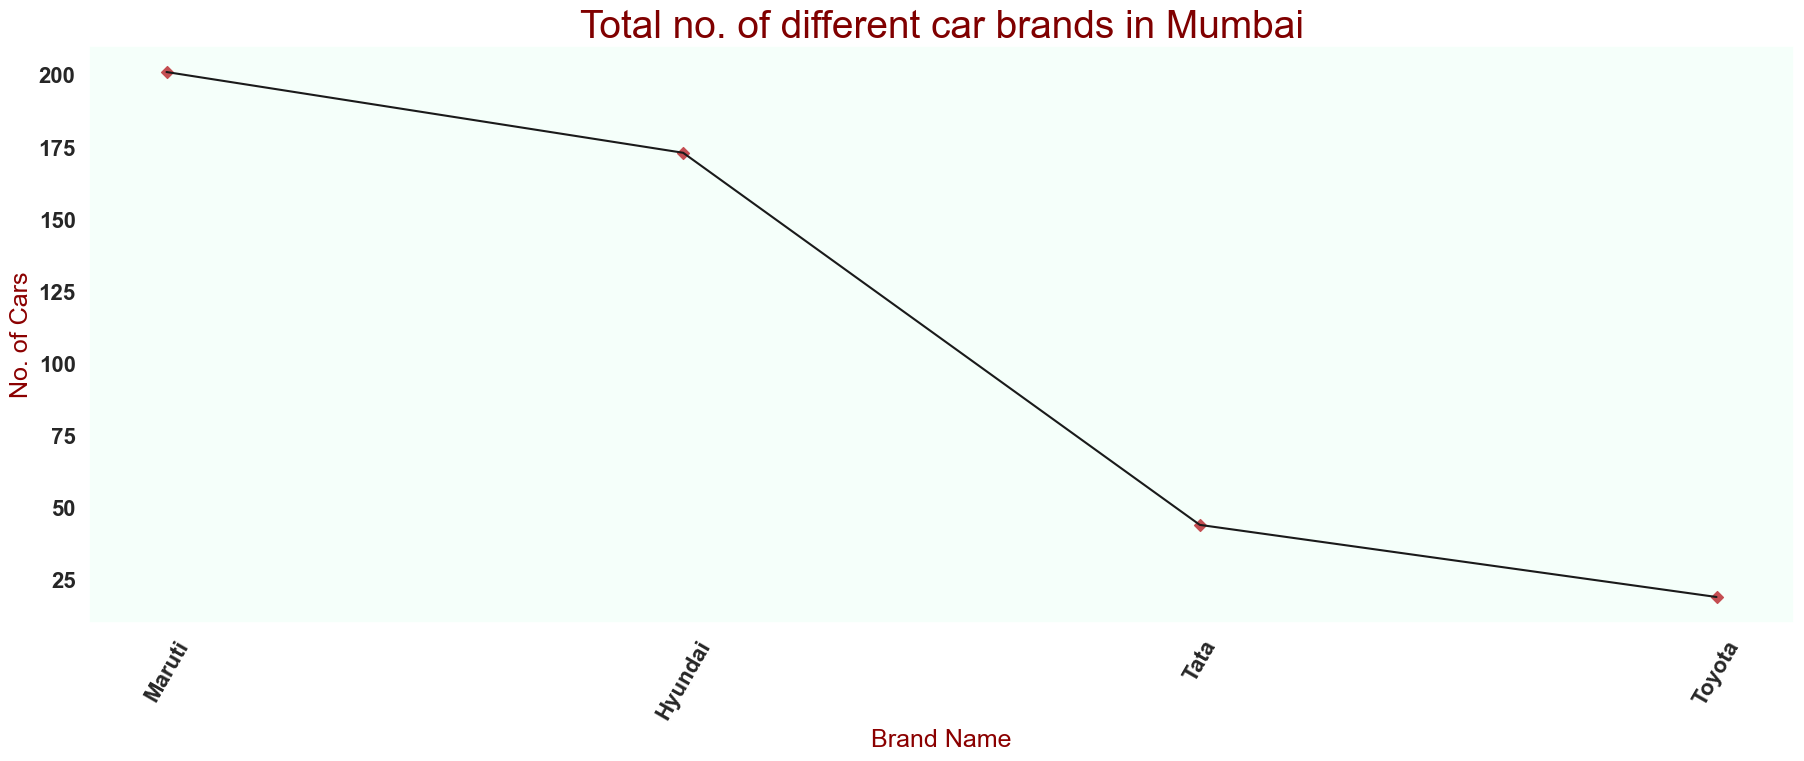

In [77]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','count',data=mumbai_brands,color='k')
plt.scatter('Brand','count',data=mumbai_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Mumbai",fontsize=28,
          color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

## 8) Total no. of different Car Brands in Bangalore

In [79]:
bangalore_city = df.loc[(df['Location'] == 'Bangalore')]
bangalore_brands = bangalore_city['Brand'].value_counts().sort_values(ascending = False).reset_index()

In [80]:
bangalore_brands

,Brand,count
0,Maruti,369
1,Hyundai,332
2,Tata,97
3,Toyota,13


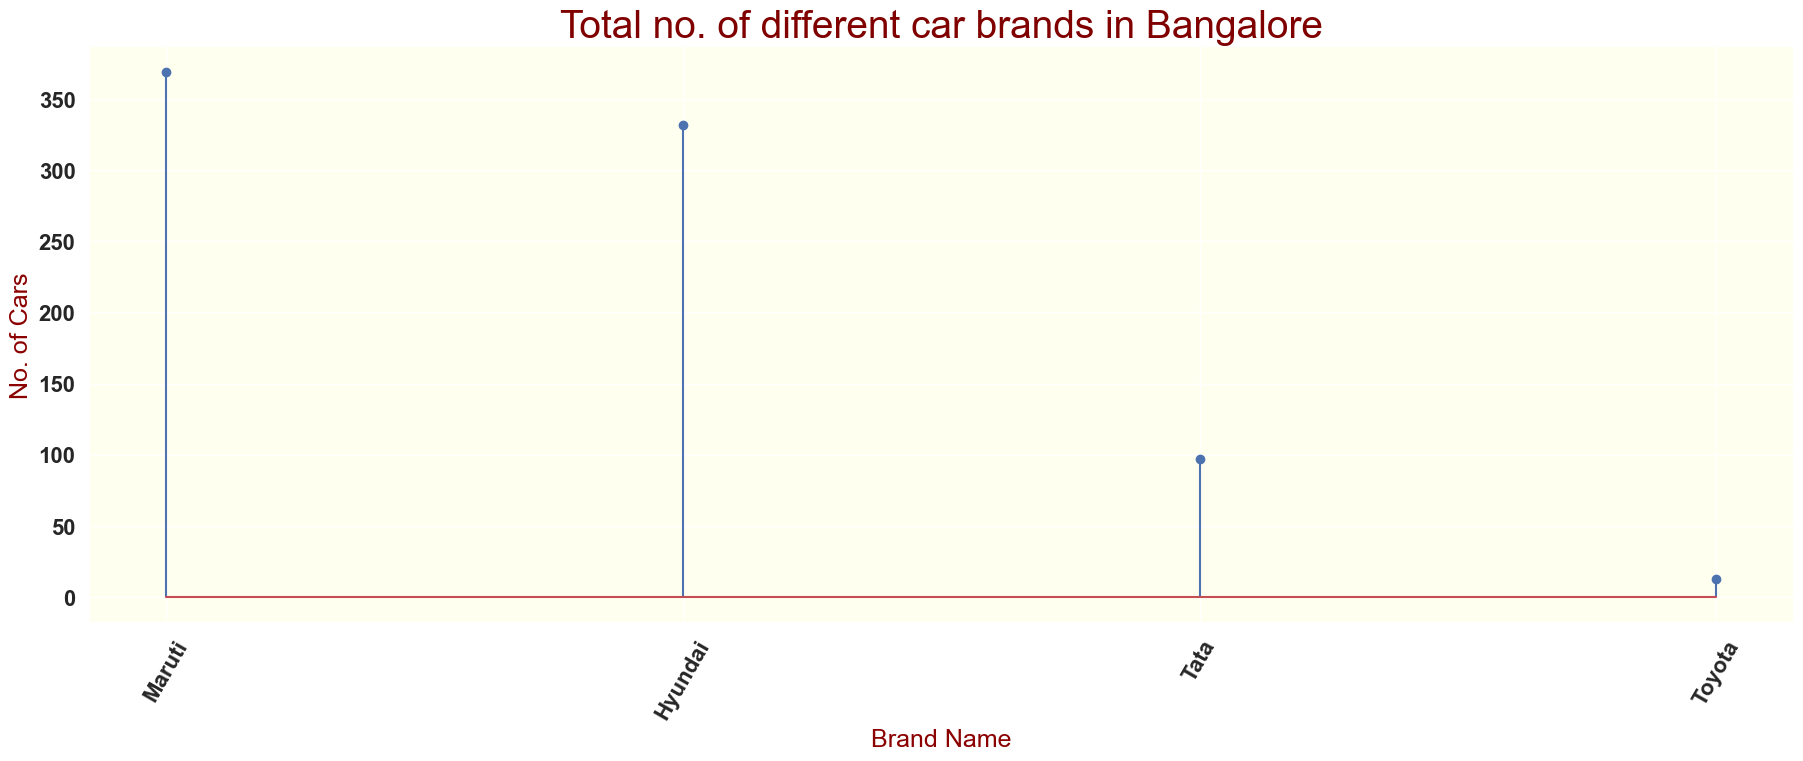

In [81]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('ivory')
plt.stem('Brand','count',data=bangalore_brands)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.title("Total no. of different car brands in Bangalore",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.show()

## 9) Number of Cars based on Fuel type in all cities

In [84]:
fuel_gear = df.groupby(by=['Fuel Type'])['Location'].count().sort_values(ascending=True).reset_index().rename(
    columns={'Location':'Count'})
fuel_gear

,Fuel Type,Count
0,Electric,1
1,CNG,124
2,Diesel,180
3,Petrol,2068


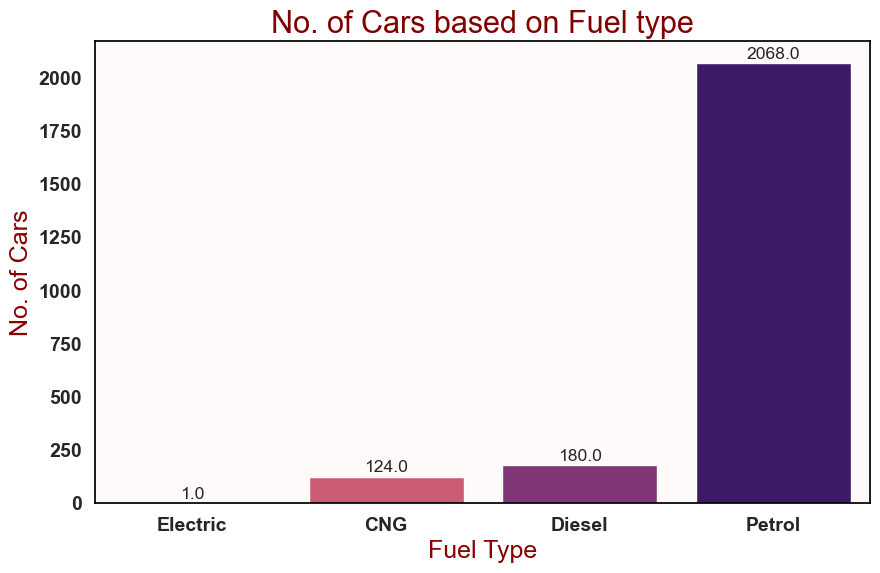

In [86]:
sns.set(rc={'figure.figsize':(10,6)})
a = sns.barplot(x ='Fuel Type',y='Count',data=fuel_gear,palette='magma_r')
plt.xticks(rotation=0,fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=12.6)
a.set_xlabel("Fuel Type", fontsize = 18,color='darkred')
a.set_ylabel("No. of Cars", fontsize =18, color='darkred')
plt.title("No. of Cars based on Fuel type",fontsize=22,color='maroon')
a.set_facecolor('snow')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

## 10) No. of Cars based on Fuel type in different Cities

In [92]:
fuel_location = df.groupby(by=['Location','Fuel Type'])['Transmission Type'].count().reset_index()

fuel_location

,Location,Fuel Type,Transmission Type
0,Bangalore,CNG,1
1,Bangalore,Diesel,88
2,Bangalore,Petrol,722
3,Hyderabad,CNG,1
4,Hyderabad,Diesel,25
5,Hyderabad,Petrol,436
6,Mumbai,CNG,65
7,Mumbai,Diesel,38
8,Mumbai,Petrol,334
9,delhi-ncr,CNG,57


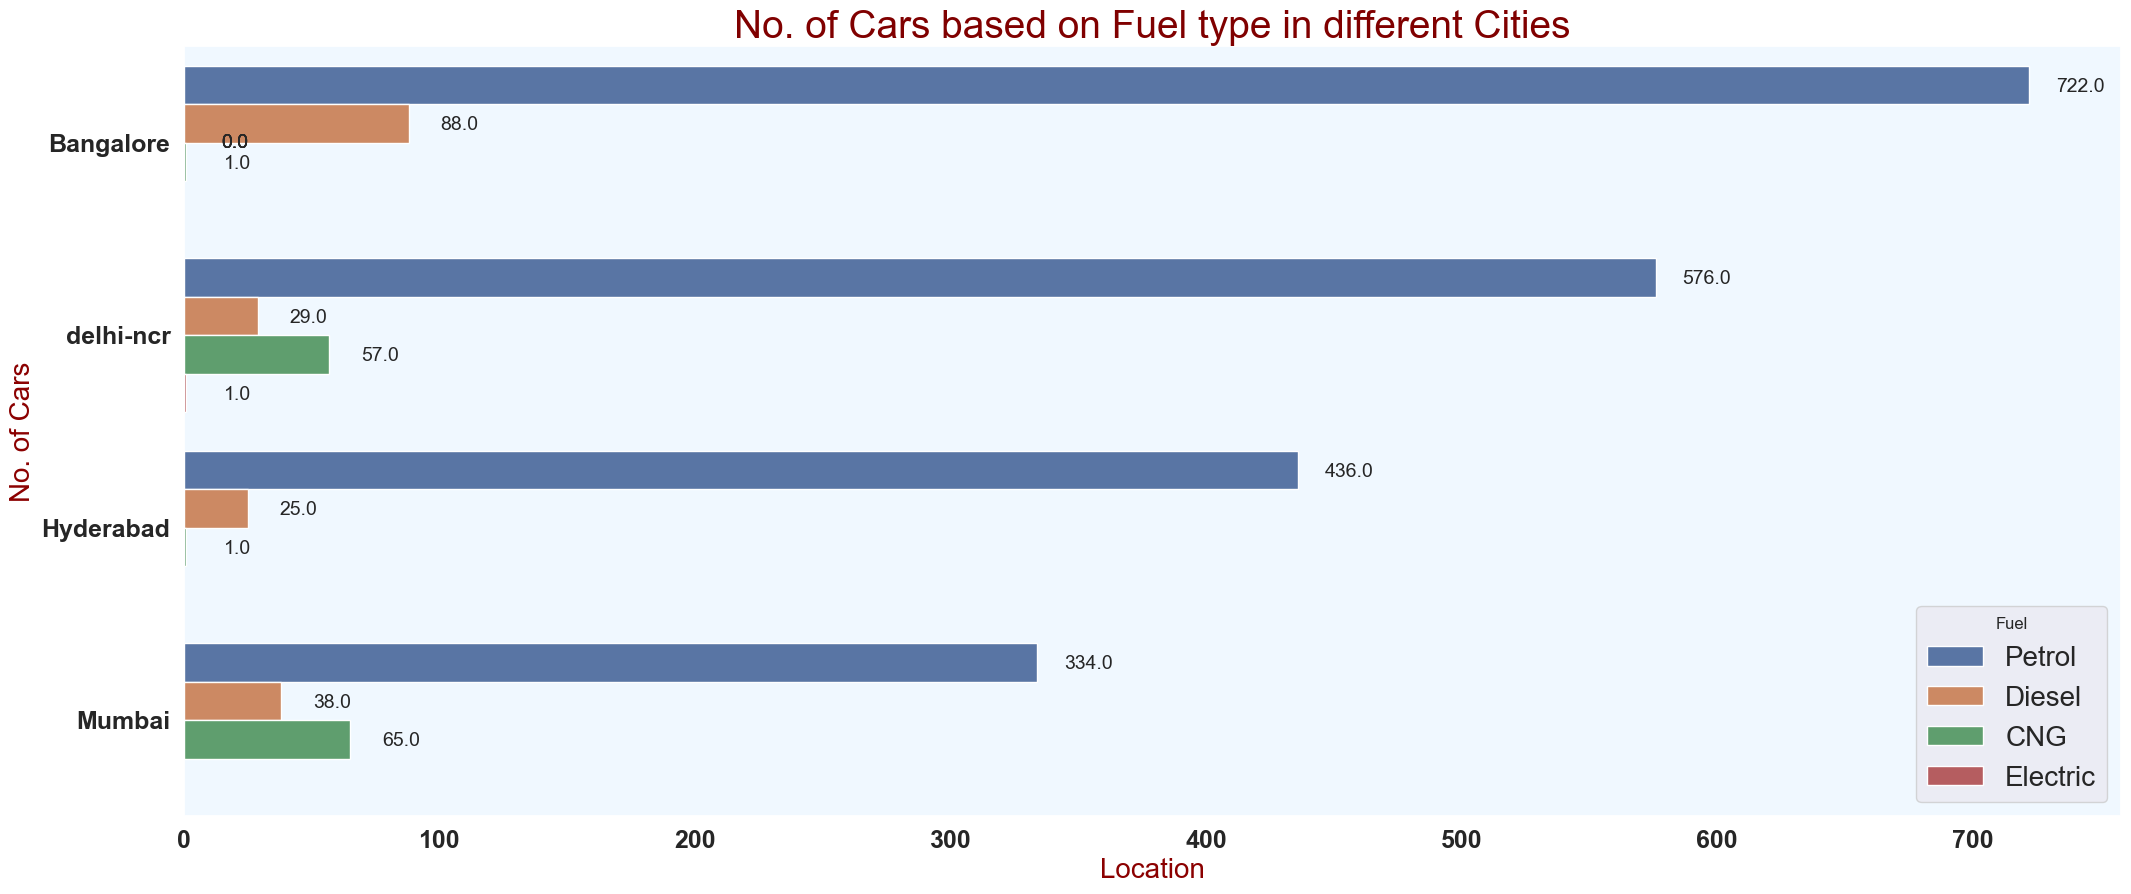

In [93]:
sns.set(rc={'figure.figsize':(25,10)})
a = sns.countplot(y = 'Location',hue='Fuel Type',data=df)
plt.xticks(rotation=0,fontsize=18,fontweight='bold')
plt.yticks(fontsize=18,fontweight='bold')
for p in a.patches:
    width = p.get_width()
    plt.text(20+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center',fontsize=14)
a.set_xlabel("Location", fontsize = 20,color='darkred')
a.set_ylabel("No. of Cars", fontsize =20, color='darkred')
plt.title("No. of Cars based on Fuel type in different Cities",fontsize=28,color='maroon')
a.set_facecolor('aliceblue')
plt.legend(loc='lower right',title='Fuel',prop={'size': 20})
a.grid(False)

## 11) No. of Cars in different cities based on Transmission Type

In [94]:
location_gear = df.groupby(by=['Location','Transmission Type']).count().reset_index()
location_gear

,Location,Transmission Type,Brand,Manufacturing Year,Model,Kilometers Driven,Fuel Type,Price
0,Bangalore,Automatic,254,254,254,254,254,254
1,Bangalore,Manual,557,557,557,557,557,557
2,Hyderabad,Automatic,120,120,120,120,120,120
3,Hyderabad,Manual,342,342,342,342,342,342
4,Mumbai,Automatic,111,111,111,111,111,111
5,Mumbai,Manual,326,326,326,326,326,326
6,delhi-ncr,Automatic,134,134,134,134,134,134
7,delhi-ncr,Manual,529,529,529,529,529,529


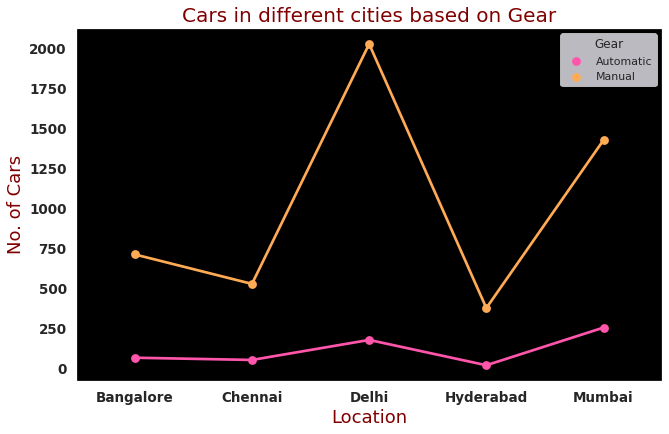

In [37]:
sns.set(rc={'figure.figsize':(10.5,6.5)})
plt.xticks(rotation=0,fontsize=13.5,fontweight='bold')
plt.yticks(fontsize=13.5,fontweight='bold')
a = sns.pointplot(x='Location',y='Count',hue='Gear',data=location_gear,palette='spring')
a.set_facecolor('black')
a.set_xlabel("Location", fontsize = 18,color='maroon')
a.set_ylabel("No. of Cars", fontsize =18, color='maroon')
plt.title("Cars in different cities based on Gear",fontsize=20,color='maroon')
plt.grid(False)

## 14) No. of Cars in different cities based on Ownership

In [38]:
location_owner = df.groupby(by=['Location','Ownership'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count'})
location_owner

,Location,Ownership,Count
0,Bangalore,1,545
1,Bangalore,2,197
2,Bangalore,3,38
3,Bangalore,4,1
4,Chennai,1,421
5,Chennai,2,140
6,Chennai,3,20
7,Chennai,4,2
8,Delhi,1,1725
9,Delhi,2,415


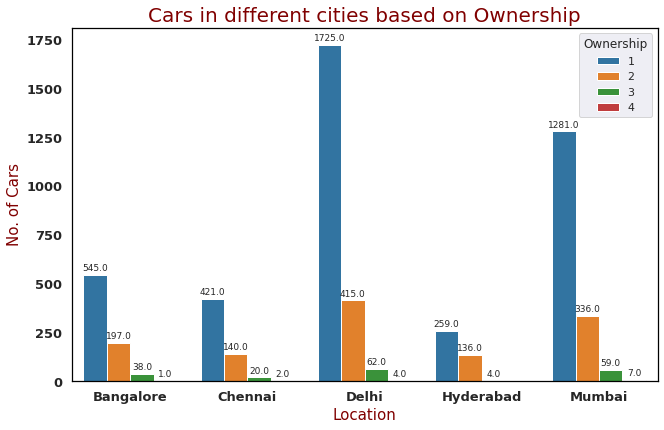

In [39]:
sns.set(rc={'figure.figsize':(10.5,6.5)})
a = sns.barplot(x='Location',y='Count',data=location_owner,hue='Ownership',palette='tab10')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=9)
a.set_facecolor('white')
a.set_xlabel("Location", fontsize = 15,color='maroon')
a.set_ylabel("No. of Cars", fontsize =15, color='maroon')
plt.title("Cars in different cities based on Ownership",fontsize=20,color='maroon')
plt.xticks(rotation=0,fontsize=13,fontweight='bold')
plt.yticks(fontsize=13,fontweight='bold')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
a.grid(False)

In [40]:
df['Car Brand'].unique()

array(['Hyundai', 'Maruti', 'Tata', 'Honda', 'Renault', 'Volkswagen',
       'Ford', 'Toyota', 'Mahindra', 'Nissan', 'Skoda', 'Audi',
       'Chevrolet', 'KIA', 'MG', 'Datsun', 'Volvo', 'Mercedes', 'Fiat',
       'BMW', 'ISUZU', 'Ssangyong', 'Mitsubishi', 'Landrover', 'Jeep',
       'Jaguar'], dtype=object)

## 15) Average Price, EMI, Driven(Kms) based on Fuel type in Bangalore

In [41]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
bangalore = models[models['Location']=='Bangalore']
bangalore

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
0,Bangalore,Diesel,743246,2014,75446,1,16533
1,Bangalore,Electric,259199,2014,64366,1,5766
2,Bangalore,Petrol,441726,2013,48168,1,9825
3,Bangalore,Petrol + CNG,356699,2016,57073,2,7935
4,Bangalore,Petrol + LPG,249499,2009,70007,1,5550


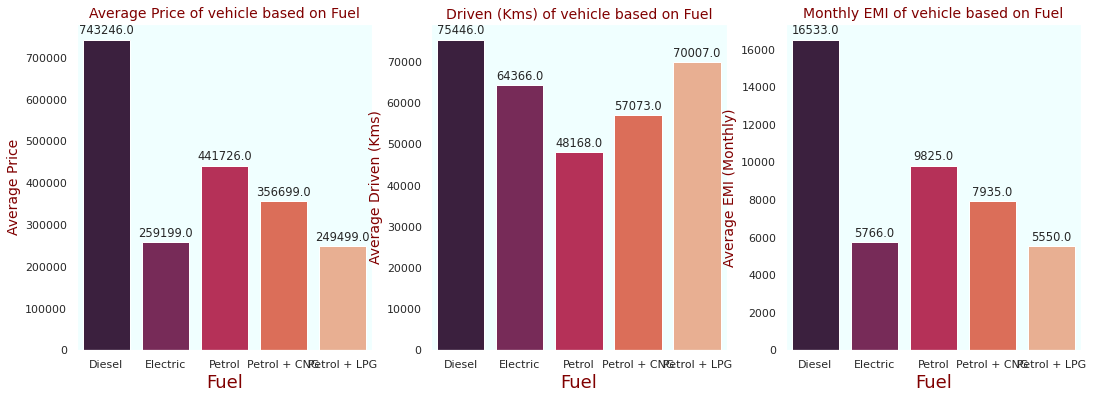

In [42]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=bangalore,palette='rocket',ax =axes[0])
a.set_facecolor('azure')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=bangalore,palette='rocket',ax =axes[1])
b.set_facecolor('azure')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=bangalore,palette='rocket',ax =axes[2])
c.set_facecolor('azure')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
a.grid(False)
b.grid(False)
c.grid(False)

## 16) Average Price, EMI, Driven(Kms) based on Fuel type in Chennai

In [43]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
chennai = models[models['Location']=='Chennai']
chennai

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
5,Chennai,Diesel,630629,2014,88197,1,14028
6,Chennai,Petrol,425408,2014,50216,1,9462
7,Chennai,Petrol + LPG,198949,2009,67483,2,4425


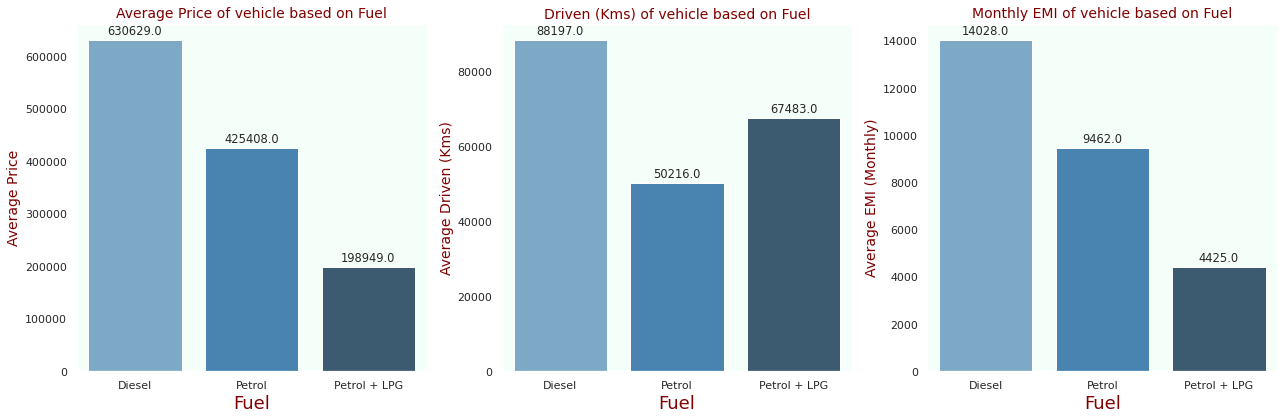

In [44]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=chennai,palette='Blues_d',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=chennai,palette='Blues_d',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=chennai,palette='Blues_d',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

## 17) Average Price, EMI, Driven(Kms) based on Fuel type in Delhi

In [45]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
delhi = models[models['Location']=='Delhi']
delhi

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
8,Delhi,Diesel,592187,2014,84902,1,13172
9,Delhi,Petrol,423003,2014,50559,1,9409
10,Delhi,Petrol + CNG,353587,2014,68317,1,7865


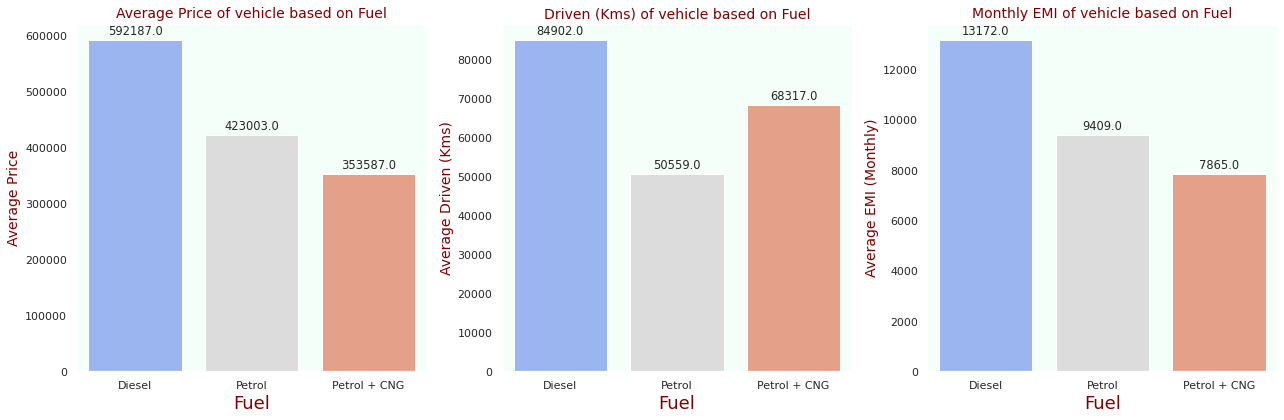

In [46]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=delhi,palette='coolwarm',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=delhi,palette='coolwarm',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=delhi,palette='coolwarm',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

## 18) Average Price, EMI, Driven(Kms) based on Fuel type in Hyderabad

In [47]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
hyderabad = models[models['Location']=='Hyderabad']
hyderabad

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
11,Hyderabad,Diesel,700956,2015,92104,1,15592
12,Hyderabad,Petrol,378409,2013,56889,1,8417
13,Hyderabad,Petrol + CNG,278236,2011,75135,1,6189
14,Hyderabad,Petrol + LPG,208159,2009,124219,1,4630


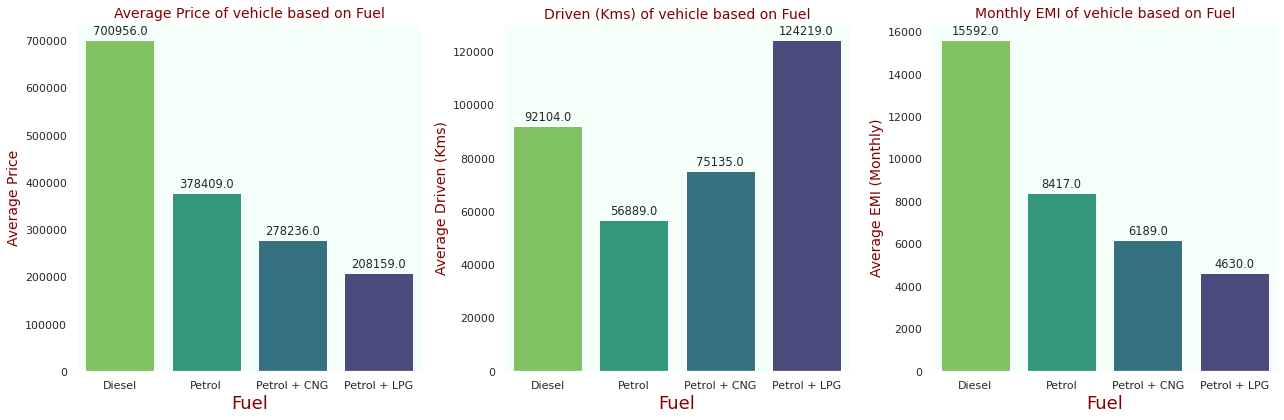

In [48]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=hyderabad,palette='viridis_r',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=hyderabad,palette='viridis_r',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=hyderabad,palette='viridis_r',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

## 19) Average Price, EMI, Driven(Kms) based on Fuel type in Mumbai

In [49]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
mumbai = models[models['Location']=='Mumbai']
mumbai

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
15,Mumbai,Diesel,726681,2014,86409,1,16164
16,Mumbai,Petrol,476289,2014,44260,1,10594
17,Mumbai,Petrol + CNG,406618,2014,67334,1,9045
18,Mumbai,Petrol + LPG,171949,2010,99602,2,3825


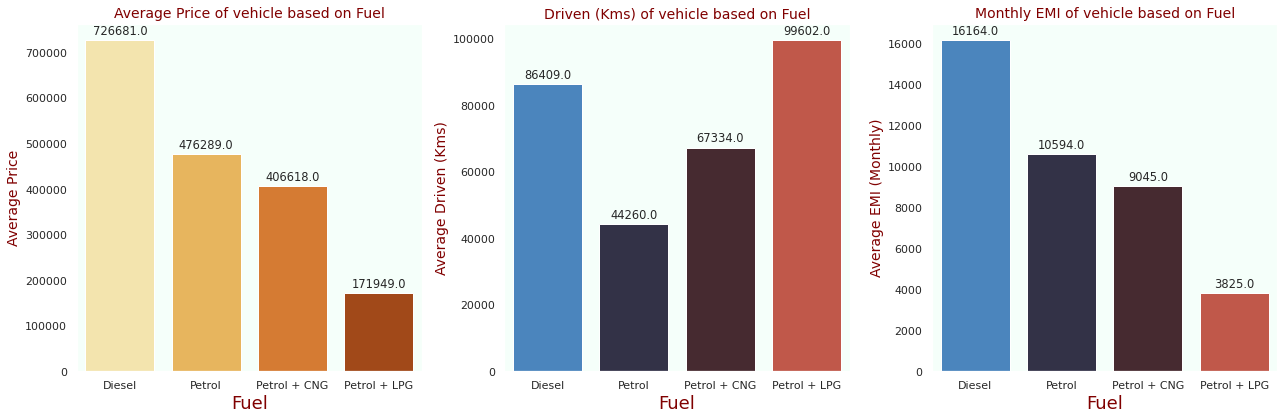

In [50]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=mumbai,palette='YlOrBr',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=mumbai,palette='icefire',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=mumbai,palette='icefire',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

## 20) Car with highest & lowest price in Hyderabad

In [51]:
by_model = df.groupby(by=['Location','Car Brand','Model']).median()
by_model = by_model.reset_index()
model_h = by_model[by_model["Location"]=='Hyderabad'].sort_values('Price',ascending=False)

In [52]:
def max_min(column):
    high = model_h[column].idxmax()
    high_model = pd.DataFrame(model_h.loc[high])
    low = model_h[column].idxmin()
    low_model = pd.DataFrame(model_h.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,1196,1102
Location,Hyderabad,Hyderabad
Car Brand,Toyota,Hyundai
Model,Innova Crysta2.4 VX 8 STR,Santro XingXO ERLX EURO III
Price,1801049.0,165299.0
Model Year,2018.0,2007.0
Driven (Kms),115695.5,62325.5
Ownership,1.0,1.5
EMI (monthly),40063.5,3677.0


## 21) Car with highest & lowest price in Delhi

In [53]:
model_d = by_model[by_model["Location"]=='Delhi'].sort_values('Price',ascending=False)

In [54]:
def max_min(column):
    high = model_d[column].idxmax()
    high_model = pd.DataFrame(model_d.loc[high])
    low = model_d[column].idxmin()
    low_model = pd.DataFrame(model_d.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,1018,526
Location,Delhi,Delhi
Car Brand,Toyota,Chevrolet
Model,Fortuner2.8 4x2 AT,SparkLS 1.0
Price,2724199.0,108500.0
Model Year,2018.0,2010.5
Driven (Kms),25870.0,42091.5
Ownership,4.0,1.0
EMI (monthly),60598.0,2413.5


## 22) Car with highest & lowest price in Mumbai

In [55]:
model_m = by_model[by_model["Location"]=='Mumbai'].sort_values('Price',ascending=False)

In [56]:
def max_min(column):
    high = model_m[column].idxmax()
    high_model = pd.DataFrame(model_m.loc[high])
    low = model_m[column].idxmin()
    low_model = pd.DataFrame(model_m.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,1715,1674
Location,Mumbai,Mumbai
Car Brand,Toyota,Tata
Model,Land CruiserLC200 VX 2 PREMIUM,NanoXT TWIST
Price,3495000.0,117500.0
Model Year,2010.0,2014.0
Driven (Kms),125306.0,66925.5
Ownership,2.0,1.0
EMI (monthly),77744.0,2614.0


## 23) Car with highest & lowest price in Bangalore

In [57]:
model_b = by_model[by_model["Location"]=='Bangalore'].sort_values('Price',ascending=False)

In [58]:
def max_min(column):
    high = model_b[column].idxmax()
    high_model = pd.DataFrame(model_b.loc[high])
    low = model_b[column].idxmin()
    low_model = pd.DataFrame(model_b.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,259,6
Location,Bangalore,Bangalore
Car Brand,Toyota,Chevrolet
Model,Fortuner2.8 4x2 MT,SparkLS 1.0
Price,2976299.0,189499.0
Model Year,2018.0,2009.0
Driven (Kms),35464.0,20028.0
Ownership,1.0,1.0
EMI (monthly),66206.0,4215.0


## 24) Car with highest & lowest price in Chennai

In [59]:
model_c = by_model[by_model["Location"]=='Chennai'].sort_values('Price',ascending=False)

In [60]:
def max_min(column):
    high = model_c[column].idxmax()
    high_model = pd.DataFrame(model_c.loc[high])
    low = model_c[column].idxmin()
    low_model = pd.DataFrame(model_c.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,478,389
Location,Chennai,Chennai
Car Brand,Tata,Maruti
Model,HexaVaricor 400 XT,A StarZXI
Price,1801499.0,181099.0
Model Year,2019.0,2009.0
Driven (Kms),46337.0,82747.0
Ownership,1.0,3.0
EMI (monthly),40073.0,4028.0


## 25) High budget & Low budger car among all cities

In [61]:
price = df.sort_values(by='Price',ascending=False)

In [62]:
def max_min(column):
    high = price[column].idxmax()
    high_model = pd.DataFrame(price.loc[high])
    low = price[column].idxmin()
    low_model = pd.DataFrame(price.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,3376,1876
Car Brand,Toyota,Maruti
Model,Land CruiserLC200 VX 2 PREMIUM,AltoLX
Price,3495000,91000
Model Year,2010,2008
Location,Mumbai,Delhi
Fuel,Diesel,Petrol
Driven (Kms),125306,68064
Gear,Manual,Manual
Ownership,2,1
EMI (monthly),77744,2024


## 26) Comparision of car brand count in different Cities

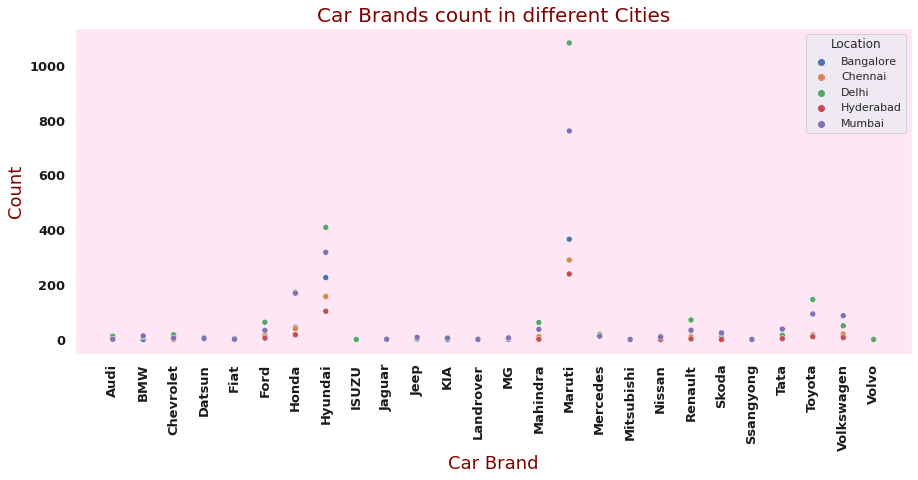

In [63]:
by_model = df.groupby(by=['Car Brand','Location'])['Price'].count().reset_index().rename(
    columns={'Price':'Count'})
sns.set(rc={'figure.figsize':(15,6)})
a = sns.scatterplot(y='Count',x='Car Brand',hue='Location',data=by_model)

a.set_ylabel("Count", fontsize = 18,color='maroon')
a.set_xlabel("Car Brand", fontsize =18, color='maroon')
a.set_title("Car Brands count in different Cities", fontsize =20, color='maroon')
a.set_facecolor('#FFE6F5')
plt.xticks(rotation = 90,fontsize=13,color='k',fontweight='bold')
plt.yticks(fontsize=13,color='k',fontweight='bold')
a.grid(False)
plt.show()

## 27) Car Brand vs Average Price

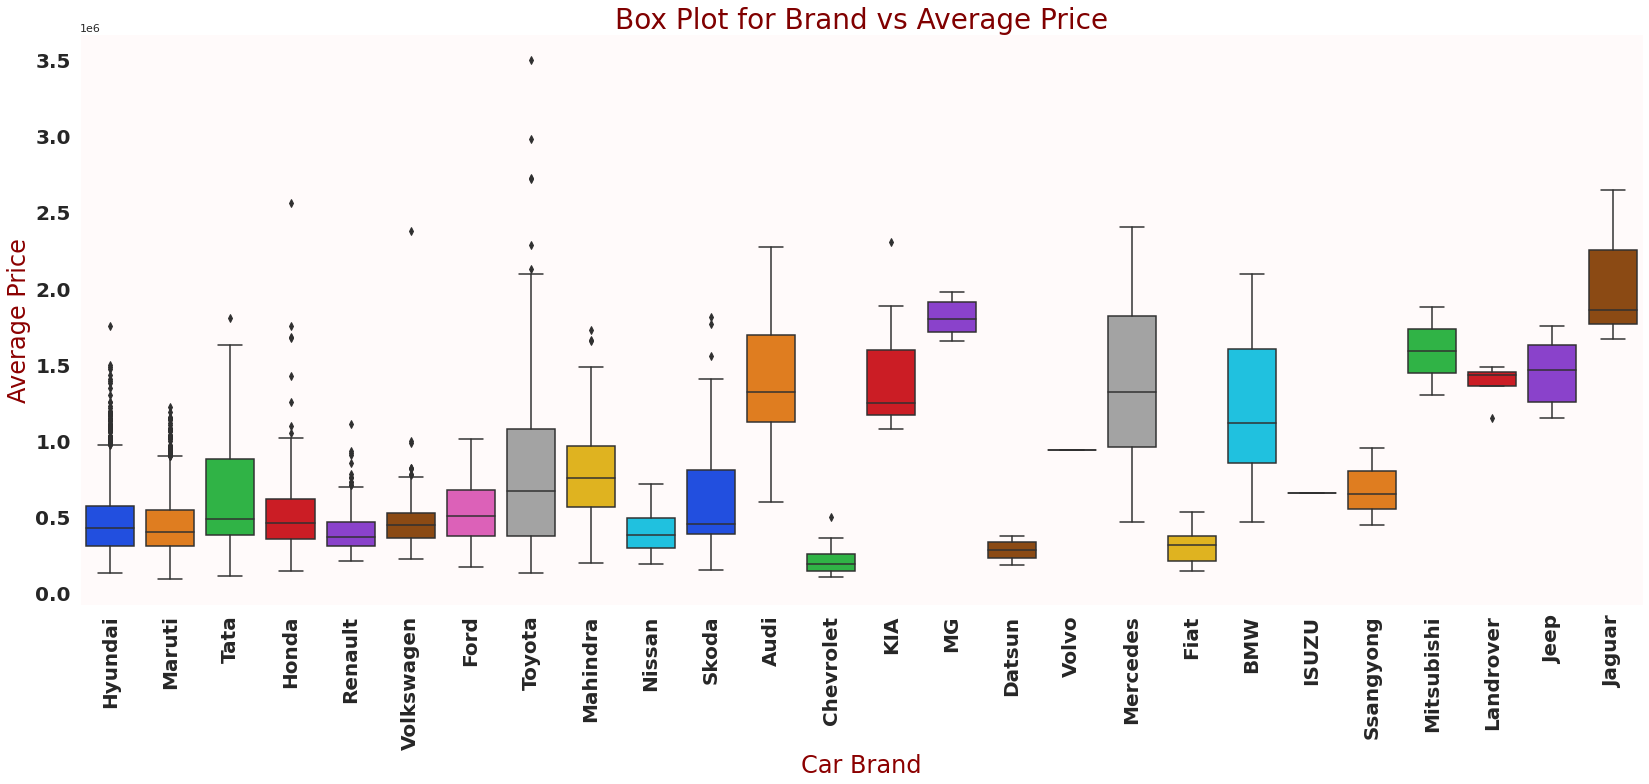

In [64]:
sns.set(rc={'figure.figsize':(28,10.5)})
a = sns.boxplot(x='Car Brand',y='Price',data=df,palette='bright')
a.set_xlabel("Car Brand", fontsize = 24,color='darkred')
a.set_ylabel("Average Price", fontsize =24, color='darkred')
plt.xticks(rotation=90,fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
a.set_title("Box Plot for Brand vs Average Price", fontsize =28, color='maroon')
a.set_facecolor('snow')
a.grid(False)
plt.show()

## 28) Heat Map for Correlation 

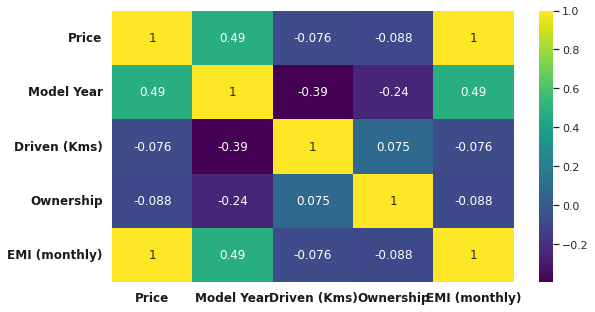

In [65]:
sns.set(rc={'figure.figsize':(9,5)})
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.xticks(fontsize=12,color='k',fontweight='bold')
plt.yticks(fontsize=12,color='k',fontweight='bold')
plt.show()

# Conclusion

* The availability of cars  in 'Delhi'(2200+) is the highest among other 4 cities.
* Compared to other 4 cities 'Hyderabad'(415+) has less available cars.
* 'Maruti' brand cars are widely available with a count of around 2800 cars in all the cities, followed by Hyundai(1240+), Honda(449), Toyota(280+)
* Most of the cars runs with 'Petrol' with a count of 3663.
* High budget car among all cities:
    * Toyota Land CruiserLC200 VX 2 PREMIUM (3495000/-), 2010 Model, available in Mumbai
* Low budget car among all cities:
    * Maruti AltoLX (91000/-), 2008 Model, available in Delhi


> Hyderabad City
> * Most available brands - Maruti(248), Hyundai(112), Honda(17), Toyota(11), Volkswagon(9)
> * Cars availability - Petrol(319), Diesel(85), Petrol+CNG(9), Petrol+LPG(4)
> * Recent year models availability - 2016(21), 2017(47), 2018(43), 2019(30), 2020(3)
> * Availability based on Gear - Automatic(25), Manual(392)
> * High Budget car - Toyota Innova Crysta2.4 VX 8 STR (1801049/-), 2018 Model
> * Low Budget car - Hyundai AccentGLE (166099/-), 2008 Model

> Delhi City
> * Most available brands - Maruti(1069), Hyundai(404), Honda(173), Toyota(150), Renault(82)
> * Cars availability - Petrol(1122), Diesel(993), Petrol+CNG(81)
> * Recent year models availability - 2016(216), 2017(217), 2018(210), 2019(122), 2020(61), 2021(2)
> * Availability based on Gear - Automatic(182), Manual(2014)
> * High Budget car - Toyota Fortuner2.8 4x2 AT	(2918399/-), 2018 Model
> * Low Budget car - Cheverlet SparkLS 1.0 (112000/-), 2010 Model

> Mumbai City
> * Most available brands - Maruti(802), Hyundai(331), Honda(176), Toyota(93), Volkswagon(84)
> * Cars availability - Petrol(1083), Diesel(579), Petrol+CNG(71), Petrol+LPG(1)
> * Recent year models availability - 2016(224), 2017(219), 2018(148), 2019(95), 2020(37)
> * Availability based on Gear - Automatic(258), Manual(1476)
> * High Budget car - Toyota Land CruiserLC200 VX 2 PREMIUM	 (3495000/-), 2010 Model
> * Low Budget car - Tata NanoXT TWIST (125000/-), 2014 Model

> Bangalore City
> * Most available brands - Maruti(378), Hyundai(228), Honda(41), Renault(29), Volkswagon(9)
> * Cars availability - Petrol(658), Diesel(116), Petrol+CNG(1), Petrol+LPG(5), Electric(1)
> * Recent year models availability - 2016(77), 2017(71), 2018(54), 2019(37), 2020(7), 2021(1)
> * Availability based on Gear - Automatic(70), Manual(711)
> * High Budget car - MG HECTORSHARP 2.0 DIESEL (1964099/-), 2019 Model
> * Low Budget car - Chevorlet SparkLS 1.0 (189499/-), 2009 Model

> Chennai City
> * Most available brands - Maruti(300), Hyundai(167), Honda(42), Volkswagon(23), Ford(16)
> * Cars availability - Petrol(481), Diesel(124), Petrol+LPG(4)
> * Recent year models availability - 2016(81), 2017(79), 2018(68), 2019(41), 2020(6)
> * Availability based on Gear - Automatic(60), Manual(549)
> * High Budget car - Tata HexaVaricor 400 XT (1801499/-), 2019 Model
> * Low Budget car - ChevorletSparkLS 1.0 (171799/-), 2011 Model

#### The above data in conclusion may change upon time to time because the data in the website is not static.